In [1]:
from load_embeddings import normalized_validation_embeddings, normalized_test_embeddings, label_list_test_embeddings

label_list_test_embeddings = label_list_test_embeddings[:len(normalized_test_embeddings)]
print(normalized_validation_embeddings.shape)  # (140102, 1000)
print(normalized_test_embeddings.shape)  # (176465, 1000)
print(label_list_test_embeddings.shape)  # (176465,)
print(label_list_test_embeddings.sum())  # 495

(140102, 1000)
(176465, 1000)
(176465,)
495


In [2]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score

# Step 2: Fit a density estimation model (Gaussian Mixture Model)
gmm = GaussianMixture(n_components=1, covariance_type='full')
gmm.fit(normalized_validation_embeddings)

GaussianMixture()

In [3]:
# Step 3: Detect anomalies
# Score samples: lower score indicates higher likelihood of being an outlier
test_scores = gmm.score_samples(normalized_test_embeddings)

# Choose a threshold for anomaly detection
threshold = np.percentile(test_scores, 5)  # This is an arbitrary choice; you might need to tune it

# Classify samples based on the threshold
predicted_labels = test_scores < threshold

# Step 4: Evaluate the results
# Assuming label_list_test_sample has 1 for artifacts and 0 for normal data
accuracy = accuracy_score(label_list_test_embeddings, predicted_labels)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9488227127192361


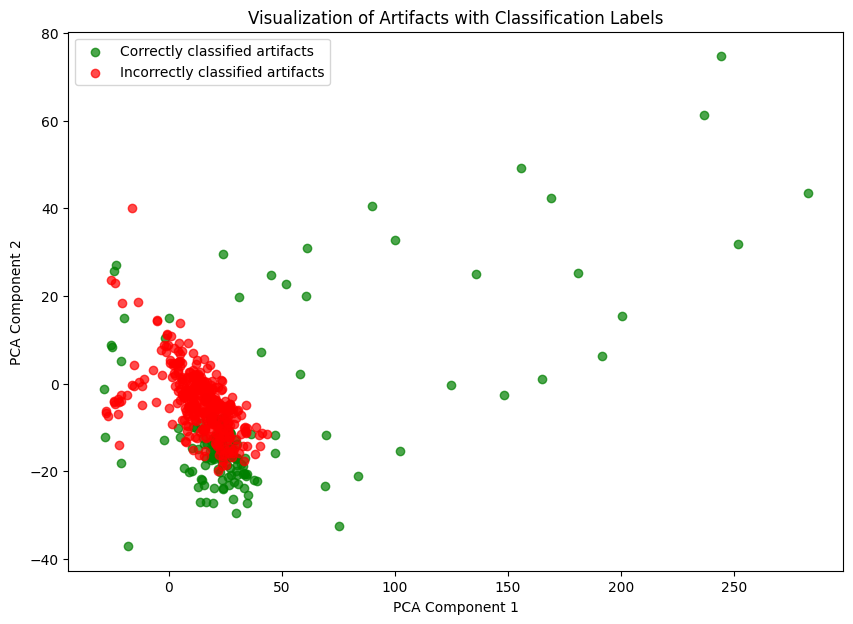

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# Step 5: Identify all artifacts
artifacts_mask = label_list_test_embeddings == 1

# Separate correctly and incorrectly classified artifacts
correctly_classified_artifacts_mask = artifacts_mask & (predicted_labels == label_list_test_embeddings)
incorrectly_classified_artifacts_mask = artifacts_mask & (predicted_labels != label_list_test_embeddings)

# Step 6: Standardize the embeddings
scaler = StandardScaler()
normalized_test_embeddings_scaled = scaler.fit_transform(normalized_test_embeddings)

# Step 7: Reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(normalized_test_embeddings_scaled)

# Step 8: Plot the results
plt.figure(figsize=(10, 7))
plt.scatter(reduced_embeddings[correctly_classified_artifacts_mask, 0], reduced_embeddings[correctly_classified_artifacts_mask, 1], 
            c='green', label='Correctly classified artifacts', alpha=0.7)
plt.scatter(reduced_embeddings[incorrectly_classified_artifacts_mask, 0], reduced_embeddings[incorrectly_classified_artifacts_mask, 1], 
            c='red', label='Incorrectly classified artifacts', alpha=0.7)
plt.title('Visualization of Artifacts with Classification Labels')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()